In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_red(text):
    print('\x1b[31m' + str(text) + '\x1b[0m')
def print_yellow(text):
    print('\x1b[33m' + str(text) + '\x1b[0m')
def print_green(text):
    print('\x1b[32m' + str(text) + '\x1b[0m')
def print_pink(text):
    print('\x1b[35m' + str(text) + '\x1b[0m')
def print_cyan(text):
    print('\x1b[36m' + str(text) + '\x1b[0m')

In [57]:
import os

dataset = 'HIGHS_COIN/'
instances_folder = '/content/drive/MyDrive/Universidad/10 Semester/Trabajo de Grado/datasets/'
instances_n = len([os.path.join(instances_folder+dataset, f) for f in os.listdir(instances_folder+dataset) if f.endswith('.dzn')])
instances = []
labels_txt = ''

# Get instances
for i in range(0,instances_n):
  with open(instances_folder+dataset+str(i)+'.dzn', encoding="utf8") as file_object:
    instances.append(file_object.read())

# Get labels
with open(instances_folder+dataset+'/labels.txt', encoding="utf8") as file_object:
    labels_txt = file_object.read()

print(len(instances))
print(labels_txt)

1378
['HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomain_max', 'COIN-BC/largest-indomain_max', 'HiGHS/largest-indomai

In [58]:
import numpy as np
import math

# Ingredients list
def get_groceries(g_array):
    data_groceries = []
    for i in range(0, len(g_array)):
        loop_groceries = g_array[i].split("groceries = [|")
        loop_groceries = loop_groceries[1].split("|];\nrequirements")
        loop_groceries = loop_groceries[0].split("|")

        for j in range(0, len(loop_groceries)):
            # Conversion from String to Int Array.
            loop_groceries[j] = [int(x) for x in loop_groceries[j].split(",")]

        data_groceries = data_groceries + [np.array(loop_groceries)]
    return data_groceries

def get_budget(array):
    data_budget = []
    for i in range(0, len(array)):
        loop_budget = array[i].split("budget = ")
        loop_budget = loop_budget[1].split(";")

        data_budget = data_budget + [int(loop_budget[0])]
    return data_budget

def get_variety(array):
    data_var = []
    for i in range(0, len(array)):
        loop_var = array[i].split("variety = ")
        loop_var = loop_var[1].split(";")

        data_var = data_var + [int(loop_var[0])]
    return data_var

def get_requirements(r_array):
    data_requirements = []
    for i in range(0, len(r_array)):
        loop_requirements = r_array[i].split("requirements = [|")
        loop_requirements = loop_requirements[1].split("|];")
        loop_requirements = loop_requirements[0].split("|")

        for j in range(0, len(loop_requirements)):
            # Conversion from String to Int Array.
            loop_requirements[j] = [int(x) for x in loop_requirements[j].split(",")]

        data_requirements = data_requirements + [np.array(loop_requirements)]
    return data_requirements

def get_offset(array):
    data_requirements = []
    for i in range(0, len(array)):
        loop_requirements = array[i].split("offset = [|")
        loop_requirements = loop_requirements[1].split("|];")
        loop_requirements = loop_requirements[0].split("|")

        for j in range(0, len(loop_requirements)):
            # Conversion from String to Int Array.
            loop_requirements[j] = [int(x) for x in loop_requirements[j].split(",")]

        data_requirements = data_requirements + [np.array(loop_requirements)]
    return data_requirements

def create_features(instances):
    res = []
    np_groceries = get_groceries(instances)
    # print('np_groceries',np_groceries[0])
    np_requirements = get_requirements(instances)
    # print('np_requirements',np_requirements[0])
    np_offset = get_offset(instances)
    # print('np_offset',np_offset[0])

    np_budget = get_budget(instances)
    # print('np_budget',np_budget)
    variety = get_variety(instances)
    # print('variety',variety)

    for i in range(0,len(instances)):
        # features: i in the left represents an Instance; 0,1... in the right represents a Feature.
        #----------------------------------------------------
        # np_groceries: i in the left represents an Instance; ":" represents all rows; 0,1... in the right represents a Macronutrient Column.
        # 0: Protein. 1: Carbo. 2: Fat. 3: Quantity. 4: Price.
        #----------------------------------------------------
        """
                    "mean_protein": np.mean(np_groceries[i][:,0]),
                    "median_protein": np.median(np_groceries[i][:,0]),
                    "std_protein": np.std(np_groceries[i][:,0]),
                    "var_protein": np.var(np_groceries[i][:,0]),
                    "min_protein": np.min(np_groceries[i][:,0]),
                    "max_protein": np.max(np_groceries[i][:,0]),
                    "argmin_protein": np.argmin(np_groceries[i][:,0]),
                    "argmax_protein": np.argmax(np_groceries[i][:,0]),
                    "q1_protein": np.percentile(np_groceries[i][:,0],25),
                    "q3_protein": np.percentile(np_groceries[i][:,0],75),

                    "n_ingredients": len(np_groceries[i]),
                    "budget" : np_budget[i],
                    "req_min_cal" : np_requirements[i][0][0],
                    "req_max_cal" : np_requirements[i][0][1],

                    CALORIES
                    "var_calories": math.ceil(np.var(4*np_groceries[i][:,0])+np.var(4*np_groceries[i][:,1])+np.var(9*np_groceries[i][:,2])),
                    "min_calories": math.ceil(np.min(4*np_groceries[i][:,0])+np.min(4*np_groceries[i][:,1])+np.min(9*np_groceries[i][:,2])),
                    "argmin_calories": math.ceil(np.argmin(4*np_groceries[i][:,0])+np.argmin(4*np_groceries[i][:,1])+np.argmin(9*np_groceries[i][:,2])),

        """
        res.append({
                    "n_ingredients": len(np_groceries[i]),

                    # "mean_protein": np.mean(np_groceries[i][:,0]),
                    "median_protein": np.median(np_groceries[i][:,0]),
                    # "std_protein": np.std(np_groceries[i][:,0]),
                    "var_protein": np.var(np_groceries[i][:,0]),
                    # "min_protein": np.min(np_groceries[i][:,0]),
                    # "max_protein": np.max(np_groceries[i][:,0]),
                    # "argmin_protein": np.argmin(np_groceries[i][:,0]),
                    # "argmax_protein": np.argmax(np_groceries[i][:,0]),
                    # "q1_protein": np.percentile(np_groceries[i][:,0],25),
                    # "q3_protein": np.percentile(np_groceries[i][:,0],75),

                    # "mean_carbo": np.mean(np_groceries[i][:,1]),
                    "median_carbo": np.median(np_groceries[i][:,1]),
                    # "std_carbo": np.std(np_groceries[i][:,1]),
                    "var_carbo": np.var(np_groceries[i][:,1]),
                    # "min_carbo": np.min(np_groceries[i][:,1]),
                    # "max_carbo": np.max(np_groceries[i][:,1]),
                    # "argmin_carbo": np.argmin(np_groceries[i][:,1]),
                    # "argmax_carbo": np.argmax(np_groceries[i][:,1]),
                    # "q1_carbo": np.percentile(np_groceries[i][:,1],25),
                    # "q3_carbo": np.percentile(np_groceries[i][:,1],75),

                    # "mean_fat": np.mean(np_groceries[i][:,2]),
                    "median_fat": np.median(np_groceries[i][:,2]),
                    # "std_fat": np.std(np_groceries[i][:,2]),
                    "var_fat": np.var(np_groceries[i][:,2]),
                    # "min_fat": np.min(np_groceries[i][:,2]),
                    # "max_fat": np.max(np_groceries[i][:,2]),
                    # "argmin_fat": np.argmin(np_groceries[i][:,2]),
                    # "argmax_fat": np.argmax(np_groceries[i][:,2]),
                    # "q1_fat": np.percentile(np_groceries[i][:,2],25),
                    # "q3_fat": np.percentile(np_groceries[i][:,2],75),

                    "req_min_cal": math.ceil(4*np_requirements[i][0][0]+4*np_requirements[i][1][0]+9*np_requirements[i][2][0]),
                    # "req_min_pro": np_requirements[i][0][0],
                    # "req_min_carbo": np_requirements[i][1][0],
                    # "req_min_fat": np_requirements[i][2][0],
                    # "req_max_pro": np_requirements[i][0][1],
                    # "req_max_carbo": np_requirements[i][1][1],
                    # "req_max_fat": np_requirements[i][2][1],
                    # "off_min_pro" : np_offset[i][0][0],
                    # "off_min_carbo" : np_offset[i][1][0],
                    # "off_min_fat" : np_offset[i][2][0],
                    # "off_max_pro" : np_offset[i][0][1],
                    # "off_max_carbo" : np_offset[i][1][1],
                    # "off_max_fat" : np_offset[i][2][1],
                    "budget" : np_budget[i],

                    "variety" : variety[i]
                    })
    return res

In [59]:
import pandas as pd
features = pd.DataFrame(create_features(instances))

print('Features:')
print_cyan(features.head(5))

import ast
labels = np.array(ast.literal_eval(labels_txt))
print('\nLabels:')
print_cyan(labels[0:5])

Features:
   n_ingredients  median_protein  var_protein  median_carbo     var_carbo  \
0            688            72.0  3164.012606         160.0  21861.704469   
1           1255            70.0  3452.746113         160.0  21103.151700   
2            728            70.0  3406.123624         154.0  22869.895587   
3           1434            70.0  3382.250093         156.0  20328.027474   
4             87            63.0  2883.321707         174.0  16662.030123   

   median_fat       var_fat  req_min_cal   budget  variety  
0       140.0  23251.820004        36625  2861000       34  
1       133.0  23220.088985        14650  2177000        6  
2       144.0  25726.686625         8790  2537000       19  
3       135.0  22933.028907        17580  2967000       18  
4       144.0  25830.609063         5860  2644000       33  

Labels:
['HiGHS/largest-indomain_max' 'COIN-BC/largest-indomain_max'
 'COIN-BC/largest-indomain_max' 'COIN-BC/largest-indomain_max'
 'HiGHS/largest-indomain_max

<Axes: >

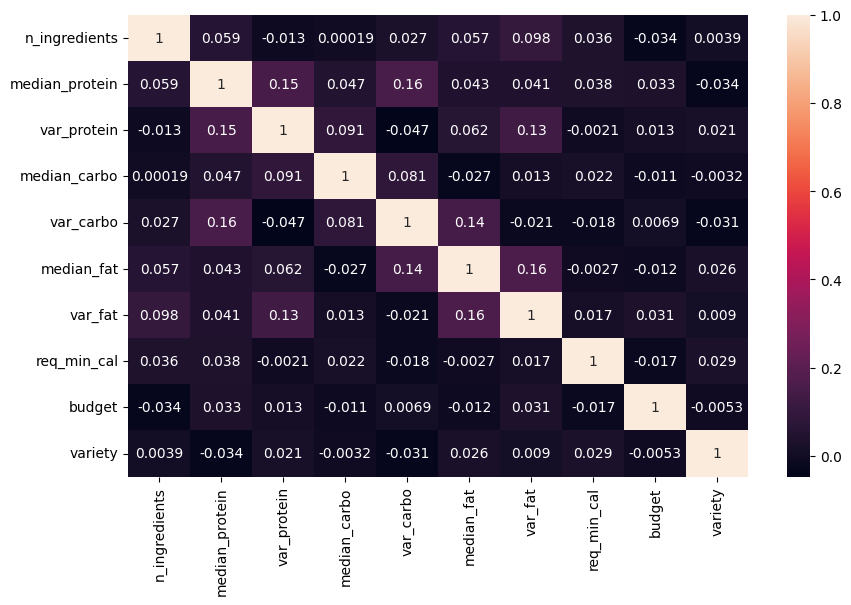

In [60]:
# Correlation Matrix
"""
In general, it is recommended to remove highly correlated features when building
a machine learning model. This is because highly correlated features can lead to
overfitting and decrease the generalization performance of the model.

When two features are highly correlated, it means that they are providing similar
information to the model. Including both features can lead to redundancy and increase
the complexity of the model unnecessarily. Therefore, removing one of the highly
correlated features can simplify the model and improve its performance.
"""
cor = features.corr()

# Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True)

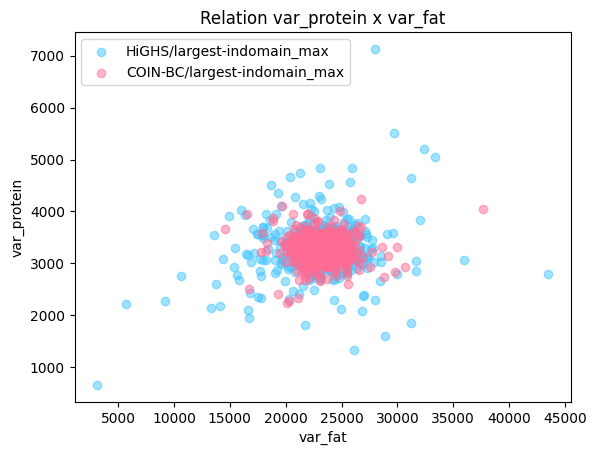

In [61]:
# Get unique labels
unique_labels = np.unique(labels)
unique_labels = sorted(unique_labels, reverse=True)


# Set up colors for each label
colors = ['#42c6ff', '#ff6b93', '#ffa500']  # Example colors for each label

# Axis
axis_y = 'var_protein'
axis_x = 'var_fat'

# Iterate over unique labels
for i, label in enumerate(unique_labels):
    # Filter data based on label
    indices = np.where(labels == label)

    # Plot the points with corresponding color and label
    plt.scatter(np.array(features[axis_x])[indices], np.array(features[axis_y])[indices], color=colors[i], alpha=0.5, label=label)


# Set labels for x-axis and y-axis
plt.xlabel(axis_x)
plt.ylabel(axis_y)

# Set title for the plot
plt.title('Relation ' + axis_y + ' x ' + axis_x)

# Add a legend to differentiate lines
plt.legend()

# Show the plot
plt.show()

# Train the Model

In [62]:
X = pd.DataFrame(features) # Features
y = pd.DataFrame(labels).values.ravel() # Labels

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, accuracy_score

# Define the values for the parameters
n_estimators = 100
min_samples_leaf = 1

# Define the random forest classifier model
clf = RandomForestClassifier(n_estimators=n_estimators,
                             min_samples_leaf=min_samples_leaf)

# Initialize the k-fold cross-validation
kfold = KFold(n_splits=7)

# Initialize lists to store the scores
y_test_acc = []
y_pred_acc = []

# Perform k-fold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    clf.fit(X_train, y_train)
    # Predict the labels for the test set
    y_pred = clf.predict(X_test)

    y_test_acc.extend(y_test)
    y_pred_acc.extend(y_pred)

print_cyan("Accuracy")
accuracy = accuracy_score(y_test_acc, y_pred_acc)
print_yellow("{:.2f}".format(accuracy*100)+'%')
print_cyan("Classification report")
print_yellow(classification_report(y_test_acc, y_pred_acc))

Accuracy
66.40%
Classification report
                              precision    recall  f1-score   support

COIN-BC/largest-indomain_max       0.65      0.73      0.68       689
  HiGHS/largest-indomain_max       0.69      0.60      0.64       689

                    accuracy                           0.66      1378
                   macro avg       0.67      0.66      0.66      1378
                weighted avg       0.67      0.66      0.66      1378



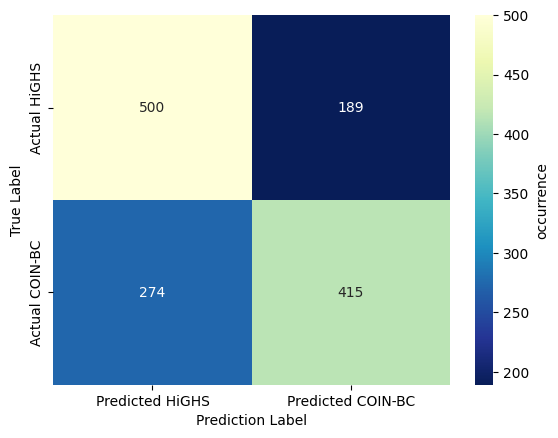

In [63]:
# sum the confusion matrices
# aggregate_cm = np.sum(confusion_matrices, axis=0)
sns.heatmap(confusion_matrix(y_test_acc, y_pred_acc), annot=True, fmt='d', cmap='YlGnBu_r', cbar_kws={"orientation": "vertical", "label": "occurrence"}, xticklabels=['Predicted HiGHS', 'Predicted COIN-BC'], yticklabels=['Actual HiGHS', 'Actual COIN-BC'])
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.show()

n_ingredients: 16.282985590735898
median_protein: 4.688348143974956
var_protein: 10.653979986862092
median_carbo: 7.390790622279483
var_carbo: 10.474604758334763
median_fat: 5.952026524474518
var_fat: 10.365313673829084
req_min_cal: 15.512195734855414
budget: 9.99473193130621
variety: 8.685023033347573


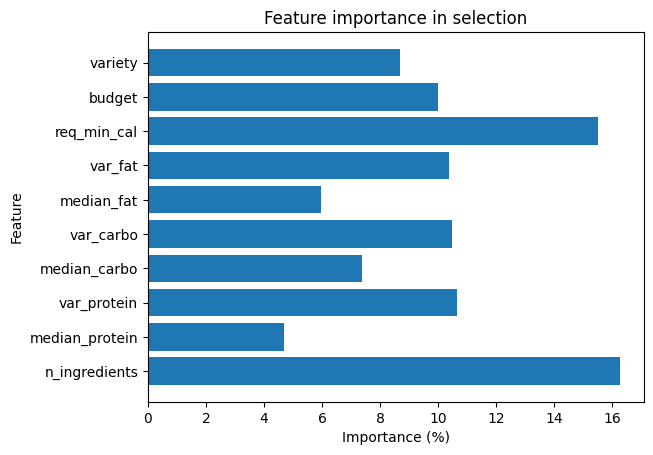

In [64]:
# Get feature importances
importances = clf.feature_importances_*100

# Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]
# print(importances)
# print(features.columns)
# Print feature importance rankings
for i, column in enumerate(features.columns):
  print(f"{column}: {importances[i]}")

# Create the horizontal bar chart
plt.barh(features.columns, importances)

# Add labels and title
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Feature importance in selection')

# Show the plot
plt.show()

<Axes: >

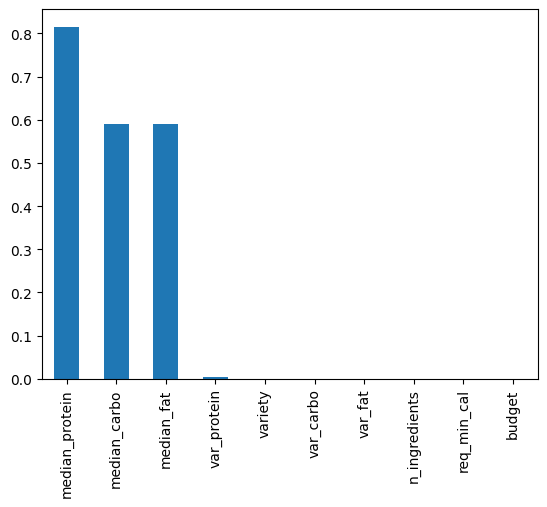

In [65]:
"""
Chi-square (χ²) test is a statistical method used for testing the independence
of two categorical variables. It is often used in feature selection for machine
learning models, where we want to select the most relevant features that are
most predictive of the target variable.

In particular, chi-square test can be used to determine the relationship between
a feature and the target variable in a classification problem. It computes the
difference between the observed frequency and the expected frequency of each
feature, and provides a score that represents how well the feature is associated
with the target variable. A higher score indicates a stronger association
between the feature and the target variable.
"""

from sklearn.feature_selection import chi2

chi_scores = chi2(features,labels)

p_values = pd.Series(chi_scores[1],index = features.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

In [66]:
import joblib
# Save the model to a custom path
filepath = instances_folder+'alg_selector_model.joblib'
joblib.dump(clf, filepath)
"""
dataset = '100_1_1700/'
instances_n = len([os.path.join(instances_folder+dataset, f) for f in os.listdir(instances_folder+dataset) if f.endswith('.dzn')])

instances = []
# Get instances
for i in range(0,instances_n):
  with open(instances_folder+dataset+str(i)+'.dzn', encoding="utf8") as file_object:
      instances.append(file_object.read())
# Get labels
with open(instances_folder+dataset+'/labels.txt', encoding="utf8") as file_object:
        labels_txt = file_object.read()


features = pd.DataFrame(create_features(instances))
labels = ast.literal_eval(labels_txt)

filepath = instances_folder+'alg_selector_model.joblib'
# Load the model from the file
clf = joblib.load(filepath)

# Predict the labels for the test set
labels_pred = clf.predict(features)
# Compute the confusion matrix
cm = confusion_matrix(labels, labels_pred)

sns.heatmap(cm, annot=True, fmt='d', cbar_kws={"orientation": "vertical", "label": "occurrence"}, xticklabels=['Actual HiGHS', 'Actual COIN-BC'], yticklabels=['Predicted HiGHS', 'Predicted COIN-BC'])
plt.xlabel('True Label')
plt.ylabel('Prediction Label')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(labels, labels_pred)
# Generate classification report
classification_rep = classification_report(labels, labels_pred)

print_cyan("\nClassification evaluated with external dataset report")
print_green(classification_rep)

print_yellow("Accuracy: "+str(accuracy*100)+"%")"""

'\ndataset = \'100_1_1700/\'\ninstances_n = len([os.path.join(instances_folder+dataset, f) for f in os.listdir(instances_folder+dataset) if f.endswith(\'.dzn\')])\n\ninstances = []\n# Get instances\nfor i in range(0,instances_n):\n  with open(instances_folder+dataset+str(i)+\'.dzn\', encoding="utf8") as file_object:\n      instances.append(file_object.read())\n# Get labels\nwith open(instances_folder+dataset+\'/labels.txt\', encoding="utf8") as file_object:\n        labels_txt = file_object.read()\n\n\nfeatures = pd.DataFrame(create_features(instances))\nlabels = ast.literal_eval(labels_txt)\n\nfilepath = instances_folder+\'alg_selector_model.joblib\'\n# Load the model from the file\nclf = joblib.load(filepath)\n\n# Predict the labels for the test set\nlabels_pred = clf.predict(features)\n# Compute the confusion matrix\ncm = confusion_matrix(labels, labels_pred)\n\nsns.heatmap(cm, annot=True, fmt=\'d\', cbar_kws={"orientation": "vertical", "label": "occurrence"}, xticklabels=[\'Actual 